In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import re 
from operator import itemgetter
import warnings
from scipy.integrate import solve_ivp
from scipy import optimize
import seaborn as sns
import PyCCELL_PRFQT as px
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')

C:\Users\nessl\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


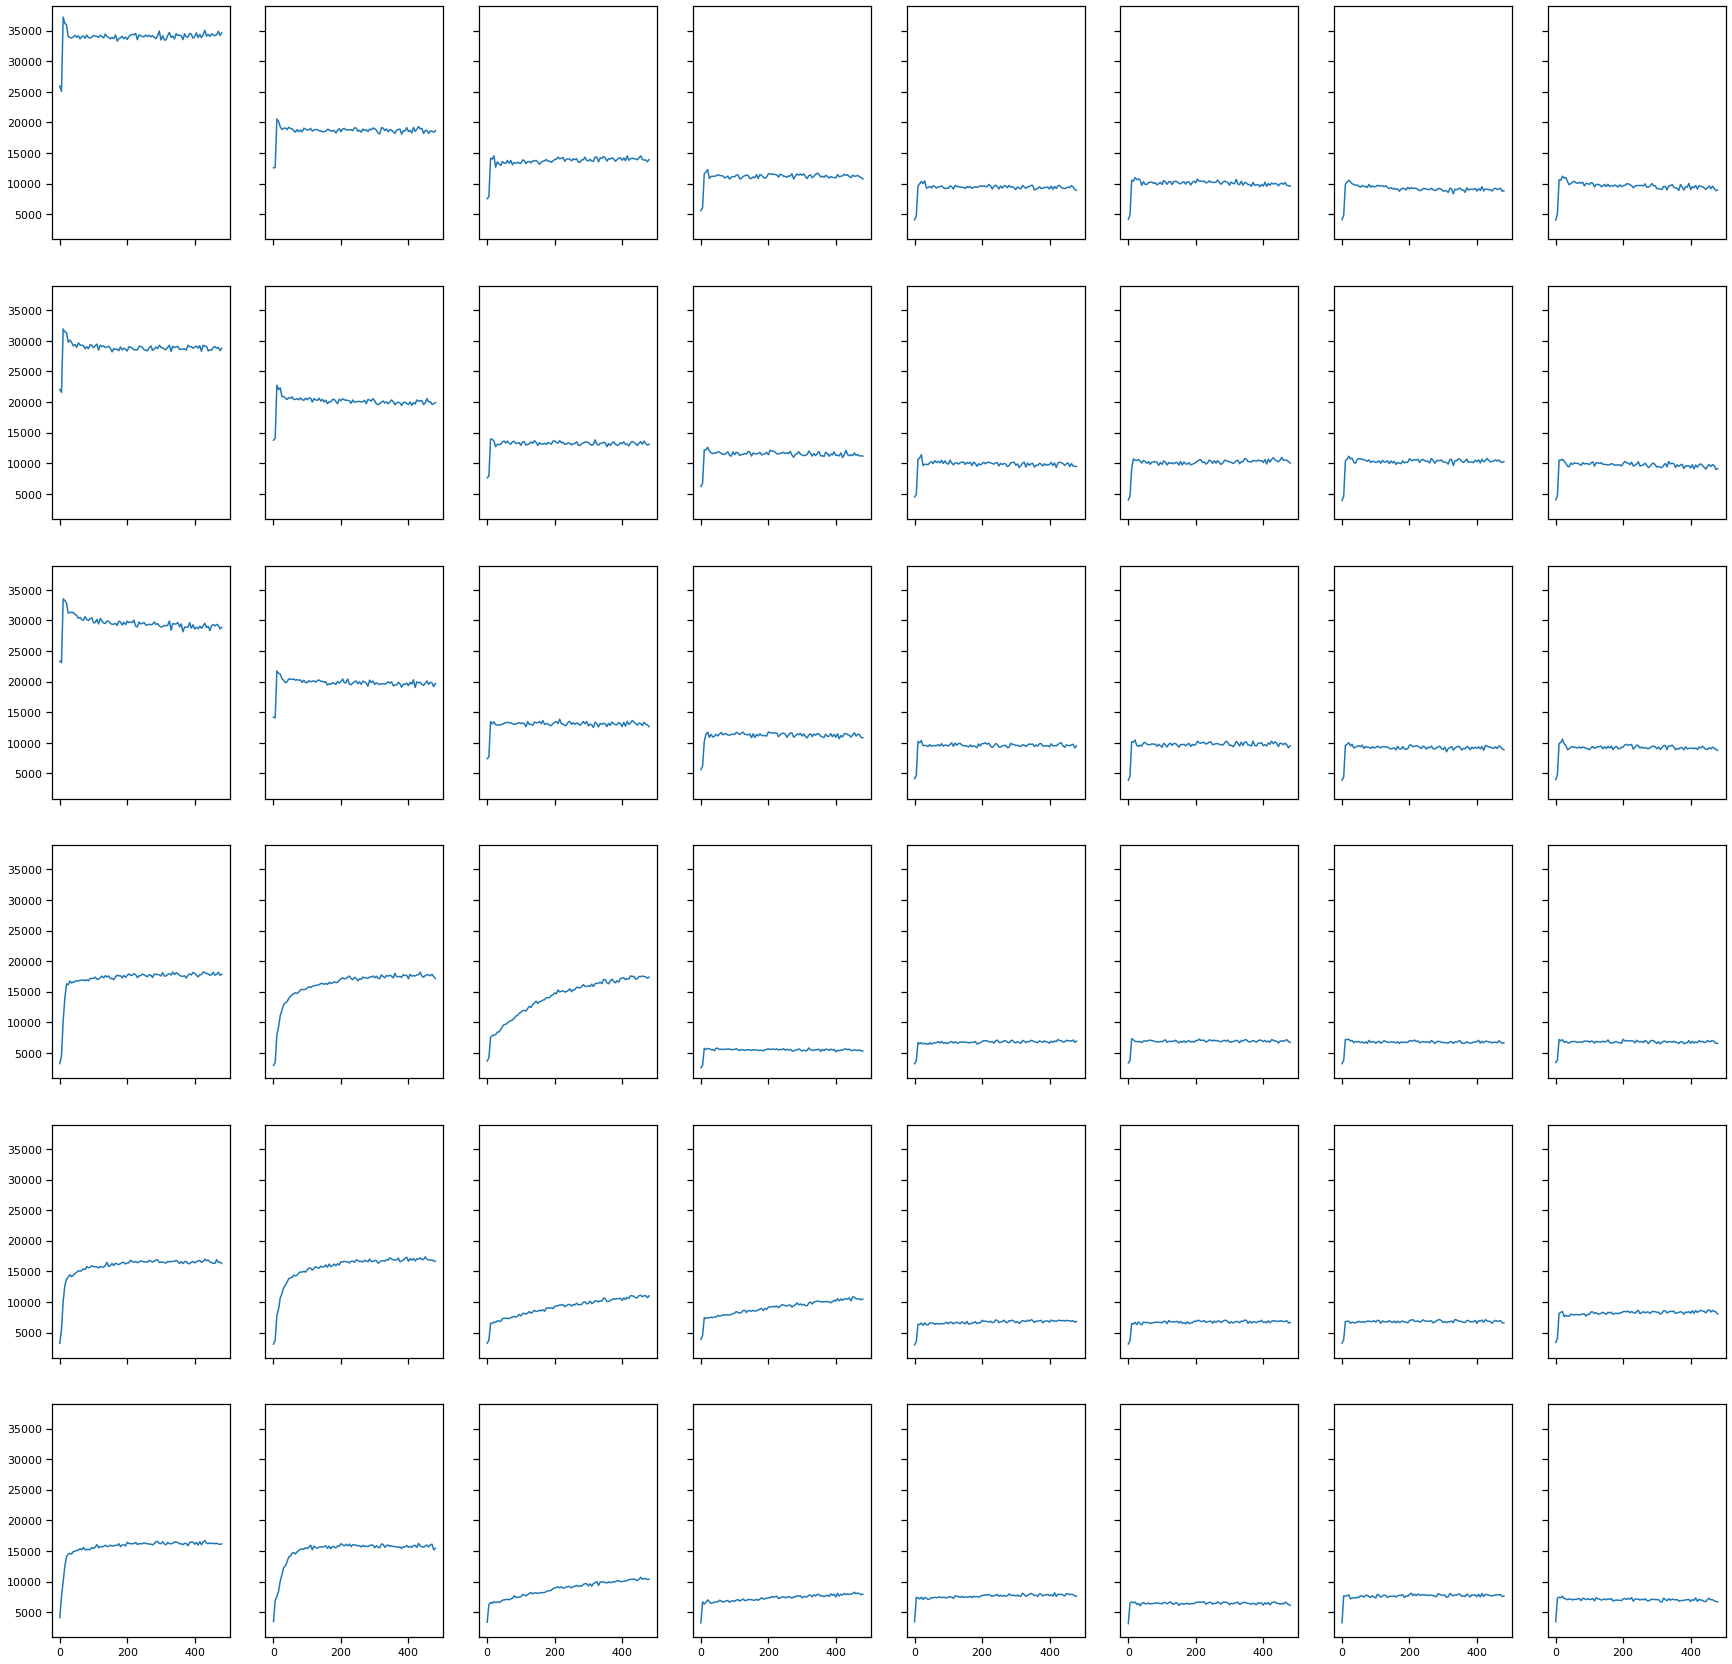

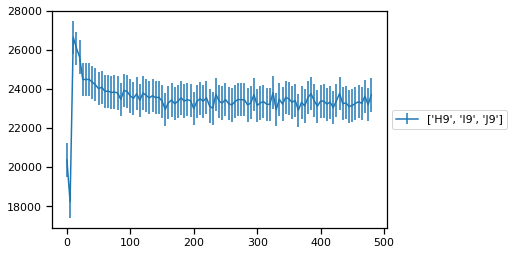

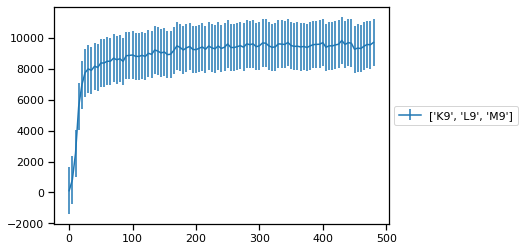

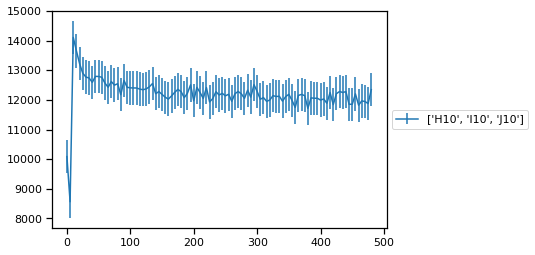

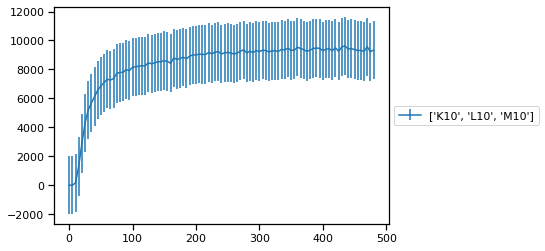

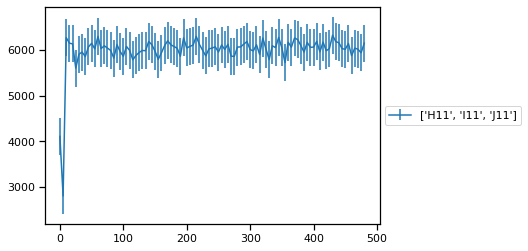

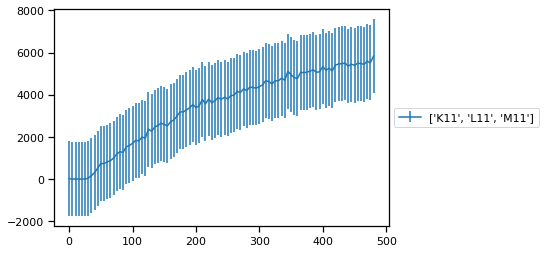

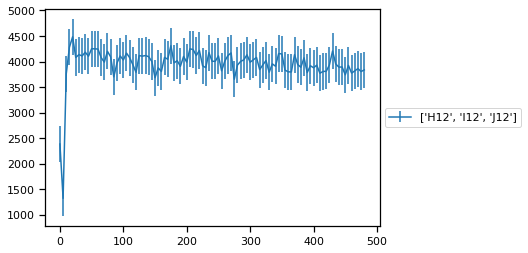

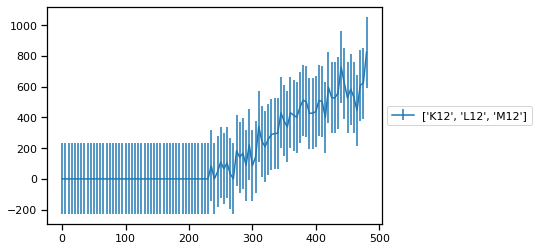

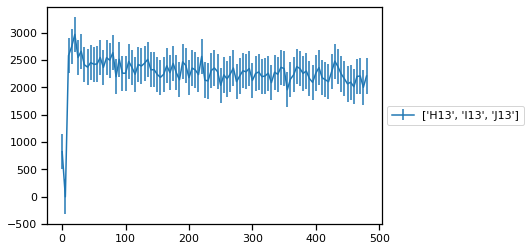

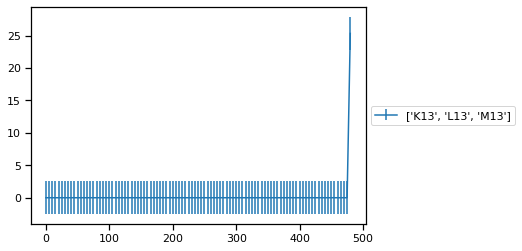

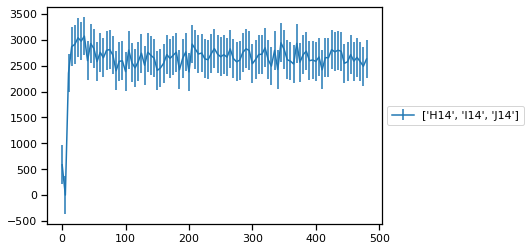

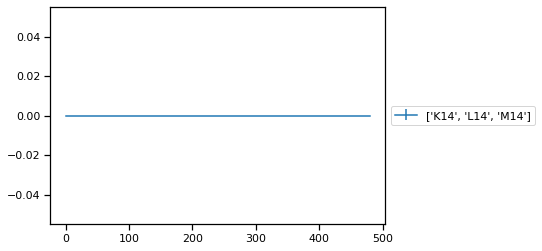

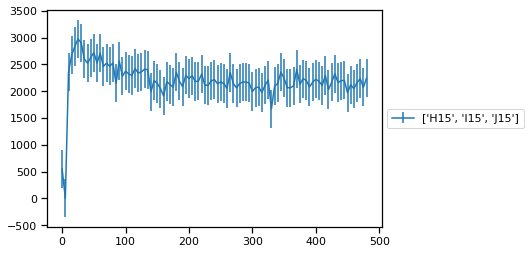

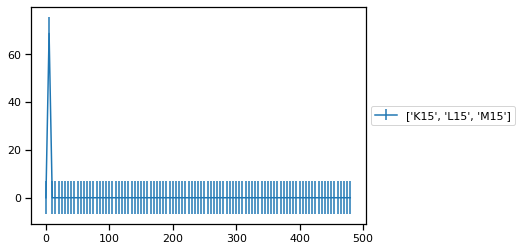

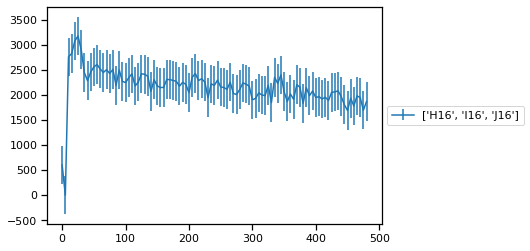

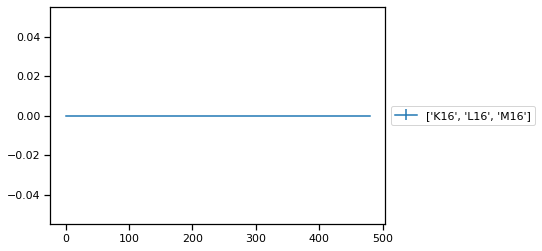

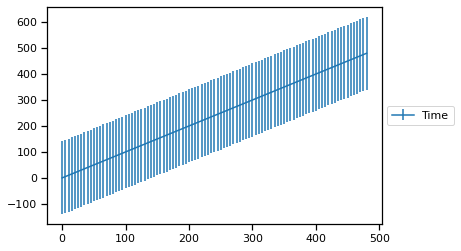

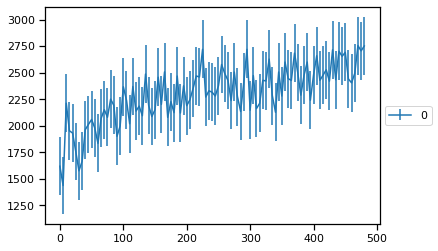

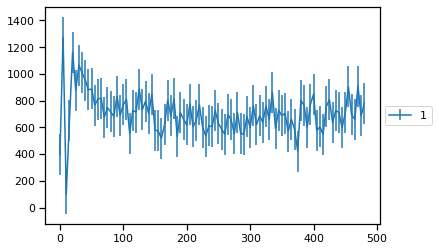

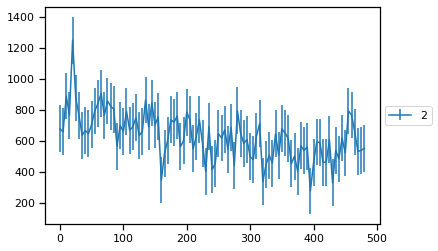

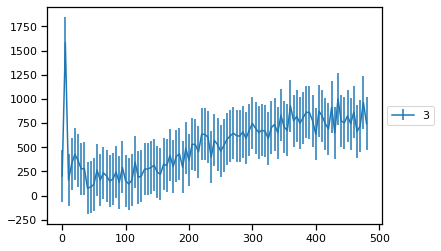

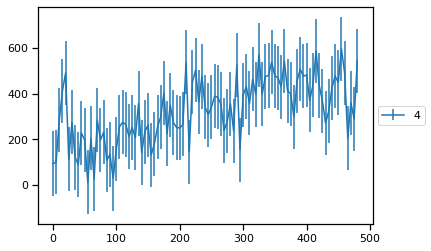

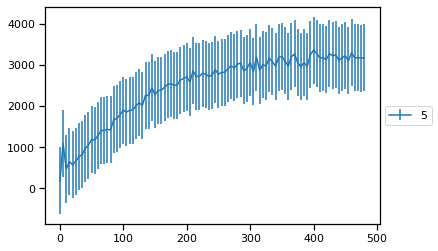

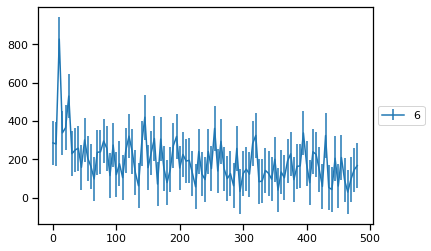

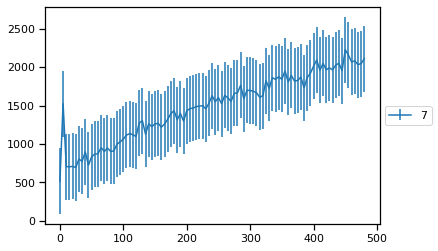

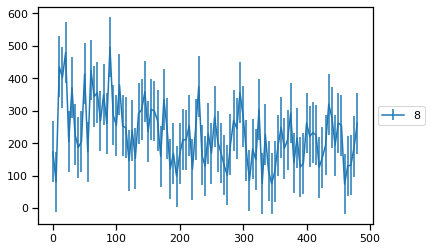

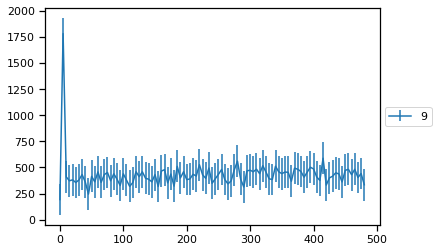

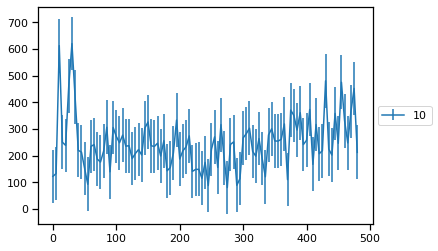

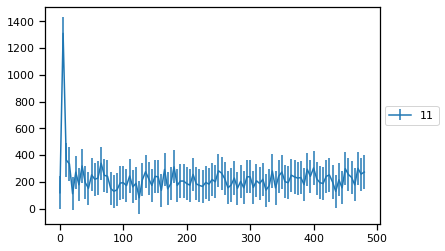

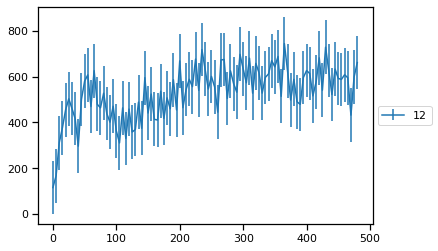

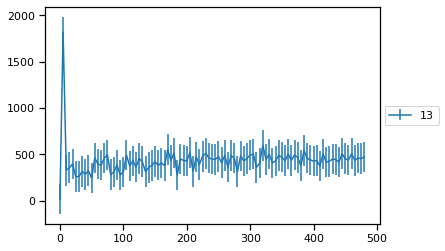

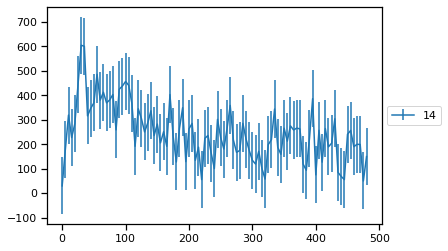

,10µM_FITC,1nM_target,5µM_FITC,0.1nM_target,2µM_FITC,0.01nM_target,1µM_FITC,1pM_target,0.1µM_FITC,0.1pM_target,...,1µM_FITC_std,1pM_target_std,0.1µM_FITC_std,0.1pM_target_std,0.01µM_FITC_std,0.01pM_target_std,1nM_FITC_std,0.1fM_target_std,NC_FITC_std,NC_target_std
0,9.697937,0.055873,4.803333,0.000000,1.954603,0.009841,1.135397,0.0,0.391905,0.0,...,0.136073,0.244756,0.082644,0.091951,0.058089,0.056878,0.054902,0.007866,0.014142,0.011208
1,8.678571,0.388095,4.078571,0.000000,1.334603,0.000000,0.628889,0.0,0.000000,0.0,...,0.133369,0.726438,0.038502,0.847473,0.063122,0.623463,0.079329,0.866017,0.084873,0.758101
2,12.689206,1.199524,6.717937,0.078254,2.983651,0.000000,1.790794,0.0,1.228095,0.0,...,0.394305,0.336887,0.207361,0.194752,0.291521,0.172988,0.148309,0.156005,0.152101,0.185042
3,12.426984,2.635714,6.500952,0.618413,2.926667,0.000000,2.038095,0.0,1.305397,0.0,...,0.161015,0.335035,0.191609,0.177314,0.119023,0.159265,0.179541,0.169277,0.108229,0.262830
4,12.210159,3.302222,6.296508,1.371587,2.918889,0.000000,2.135079,0.0,1.412381,0.0,...,0.173781,0.338014,0.228196,0.181659,0.113460,0.053356,0.216622,0.189353,0.135465,0.251958


In [28]:
correct = px.main('../results/SHERLOCK/target_concentration/sherlock_target_concentr.xlsx'
               ,70,"NO",6,8,'col',['K16','L16','M16'],"NO")

correct = correct/2100

correct['Time'] = correct['Time']*2100

correct.rename(columns={"['H9', 'I9', 'J9']": '10µM_FITC',
                   "['H10', 'I10', 'J10']": '5µM_FITC',
                     "['H11', 'I11', 'J11']":'2µM_FITC' ,
                     "['H12', 'I12', 'J12']": '1µM_FITC',
                    "['H13', 'I13', 'J13']": '0.1µM_FITC',
                      "['H14', 'I14', 'J14']":'0.01µM_FITC' ,
                     "['H15', 'I15', 'J15']": '0.001µM_FITC',
                    "['H16', 'I16', 'J16']": 'NC_FITC',
                     "['K9', 'L9', 'M9']": '1nM_target',
                   "['K10', 'L10', 'M10']": '0.1nM_target',
                     "['K11', 'L11', 'M11']":'0.01nM_target' ,
                     "['K12', 'L12', 'M12']": '1pM_target',
                    "['K13', 'L13', 'M13']": '0.1pM_target',
                      "['K14', 'L14', 'M14']":'0.01pM_target' ,
                     "['K15', 'L15', 'M15']": '0.1fM_target',
                    "['K16', 'L16', 'M16']": 'NC_target',
                     0: '10µM_FITC_std',
                   1: '1nM_target_std',
                     2: '5µM_FITC_std',
                     3: '0.1nM_target_std',
                    4: '2µM_FITC_std',
                    5: '0.01nM_target_std',
                   6: '1µM_FITC_std',
                     7:'1pM_target_std' ,
                     8: '0.1µM_FITC_std',
                    9: '0.1pM_target_std',
                    10: '0.01µM_FITC_std',
                   11: '0.01pM_target_std',
                     12: '1nM_FITC_std',
                     13: '0.1fM_target_std',
                    14: 'NC_FITC_std',
                    15:'NC_target_std'},
          inplace=True, errors='raise')

correct.head()

test = px.main('../results/SHERLOCK/1st_try_probe_dilution/sherlock_probe_concentr_2.xlsx'
               ,70,"YES",3,5,'col',['F7','G7','H7'],"YES")


test.rename(columns={"['F3', 'G3', 'H3']": '2µM_P_Cold',
                   "['F4', 'G4', 'H4']": '2µM_P',
                     "['F5', 'G5', 'H5']":'1µM_P' ,
                     "['F6', 'G6', 'H6']": '0.1µM_P',
                    "['F7', 'G7', 'H7']": 'NC_wt_cas',
                     0: '2µM_P_Cold_std',
                   1: '2µM_P_std',
                     2:'1µM_P_std' ,
                     3: '0.1µM_P_std',
                    4: 'NC_wt_cas_std'},
          inplace=True, errors='raise')

test.head()

In [3]:
def syst2(t,z,param):
    
    Tu,Pa,Pi,Tc = z
    
    GC,K1,K2,K3,K4,Km = param  
    
    dTudt = -(K1*GC*Tu)
    
    #dPadt = (K3*Tu*GC*Pi)/(Km+Tu)
    dPadt = (K3*GC*Pi)/(Km+Pi)

    dPidt = -dPadt
    
    dTcdt = (K4*Tu*GC)/(Km+Tu)
        
    return [dTudt,dPadt,dPidt,dTcdt]

def error(param,obs):
    
    times = np.linspace(0,35,35)
    t = np.linspace(0,500,500)
    
    sol = solve_ivp(syst2,t_span =[0, times.max()], y0= z , args =([param]),
                    t_eval=times,method='DOP853',dense_output=True,rtol=1e-8,atol=1e-8)
    
    m = sol.sol(times)
    
    err = []
        
    for i in range(len(m.tolist()[3])):
        err.append((obs[i]-m.tolist()[3][i])**2)    
    
    erro = np.sum(err)
    '''
    if erro < 0.05:
        print(erro)
    '''
    return erro

In [44]:
Tu = 0.001
Pa = 0.02
Pi = 4
Tc = 0.001
GC = 0.4 
K1 = 1
K2 = 0.05
K3 = 10
K4 = 0.001
Km = 500

z = [Tu,Pa,Pi,Tc]
param  = [GC,K1,K2,K3,K4,Km]

bnds = [(0.3,0.43),(0.0001,1),(0.0001,1),(0.0001,1),(0.00001,0.1),(0.001,1000)]
res = optimize.minimize(error, param, args=(list(correct[correct.columns[1]])))#,bounds=bnds,method='Powell')

In [45]:
res.x

array([4.83716063e-01, 5.82781035e-01, 5.00000000e-02, 1.00000035e+01,
       1.23958876e+06, 5.00012295e+02])

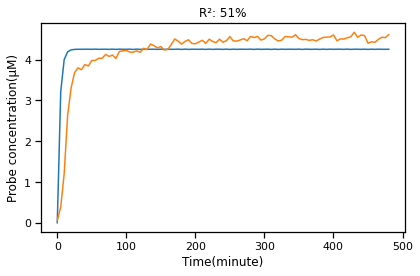

In [46]:
times = np.linspace(0,480,97)

sol = solve_ivp(syst2,t_span =[0, times.max()], y0= z , args =([res.x]),
                    t_eval=times,dense_output=True)
m = sol.sol(times)
r = r2_score(correct[correct.columns[1]],m[3])


sns.set_context('notebook')
sns.set_palette("tab10")

plt.plot(times,m[3])
plt.plot(times,correct[correct.columns[1]])
plt.xlabel('Time(minute)')
plt.ylabel('Probe concentration(µM)')
plt.title('R²: '+str(round(r*100))+'%')
plt.tight_layout()
#plt.savefig("images/SHERLOCK/modeling/first_attempt.png",dpi=300)
plt.show()

### Try on another experiment

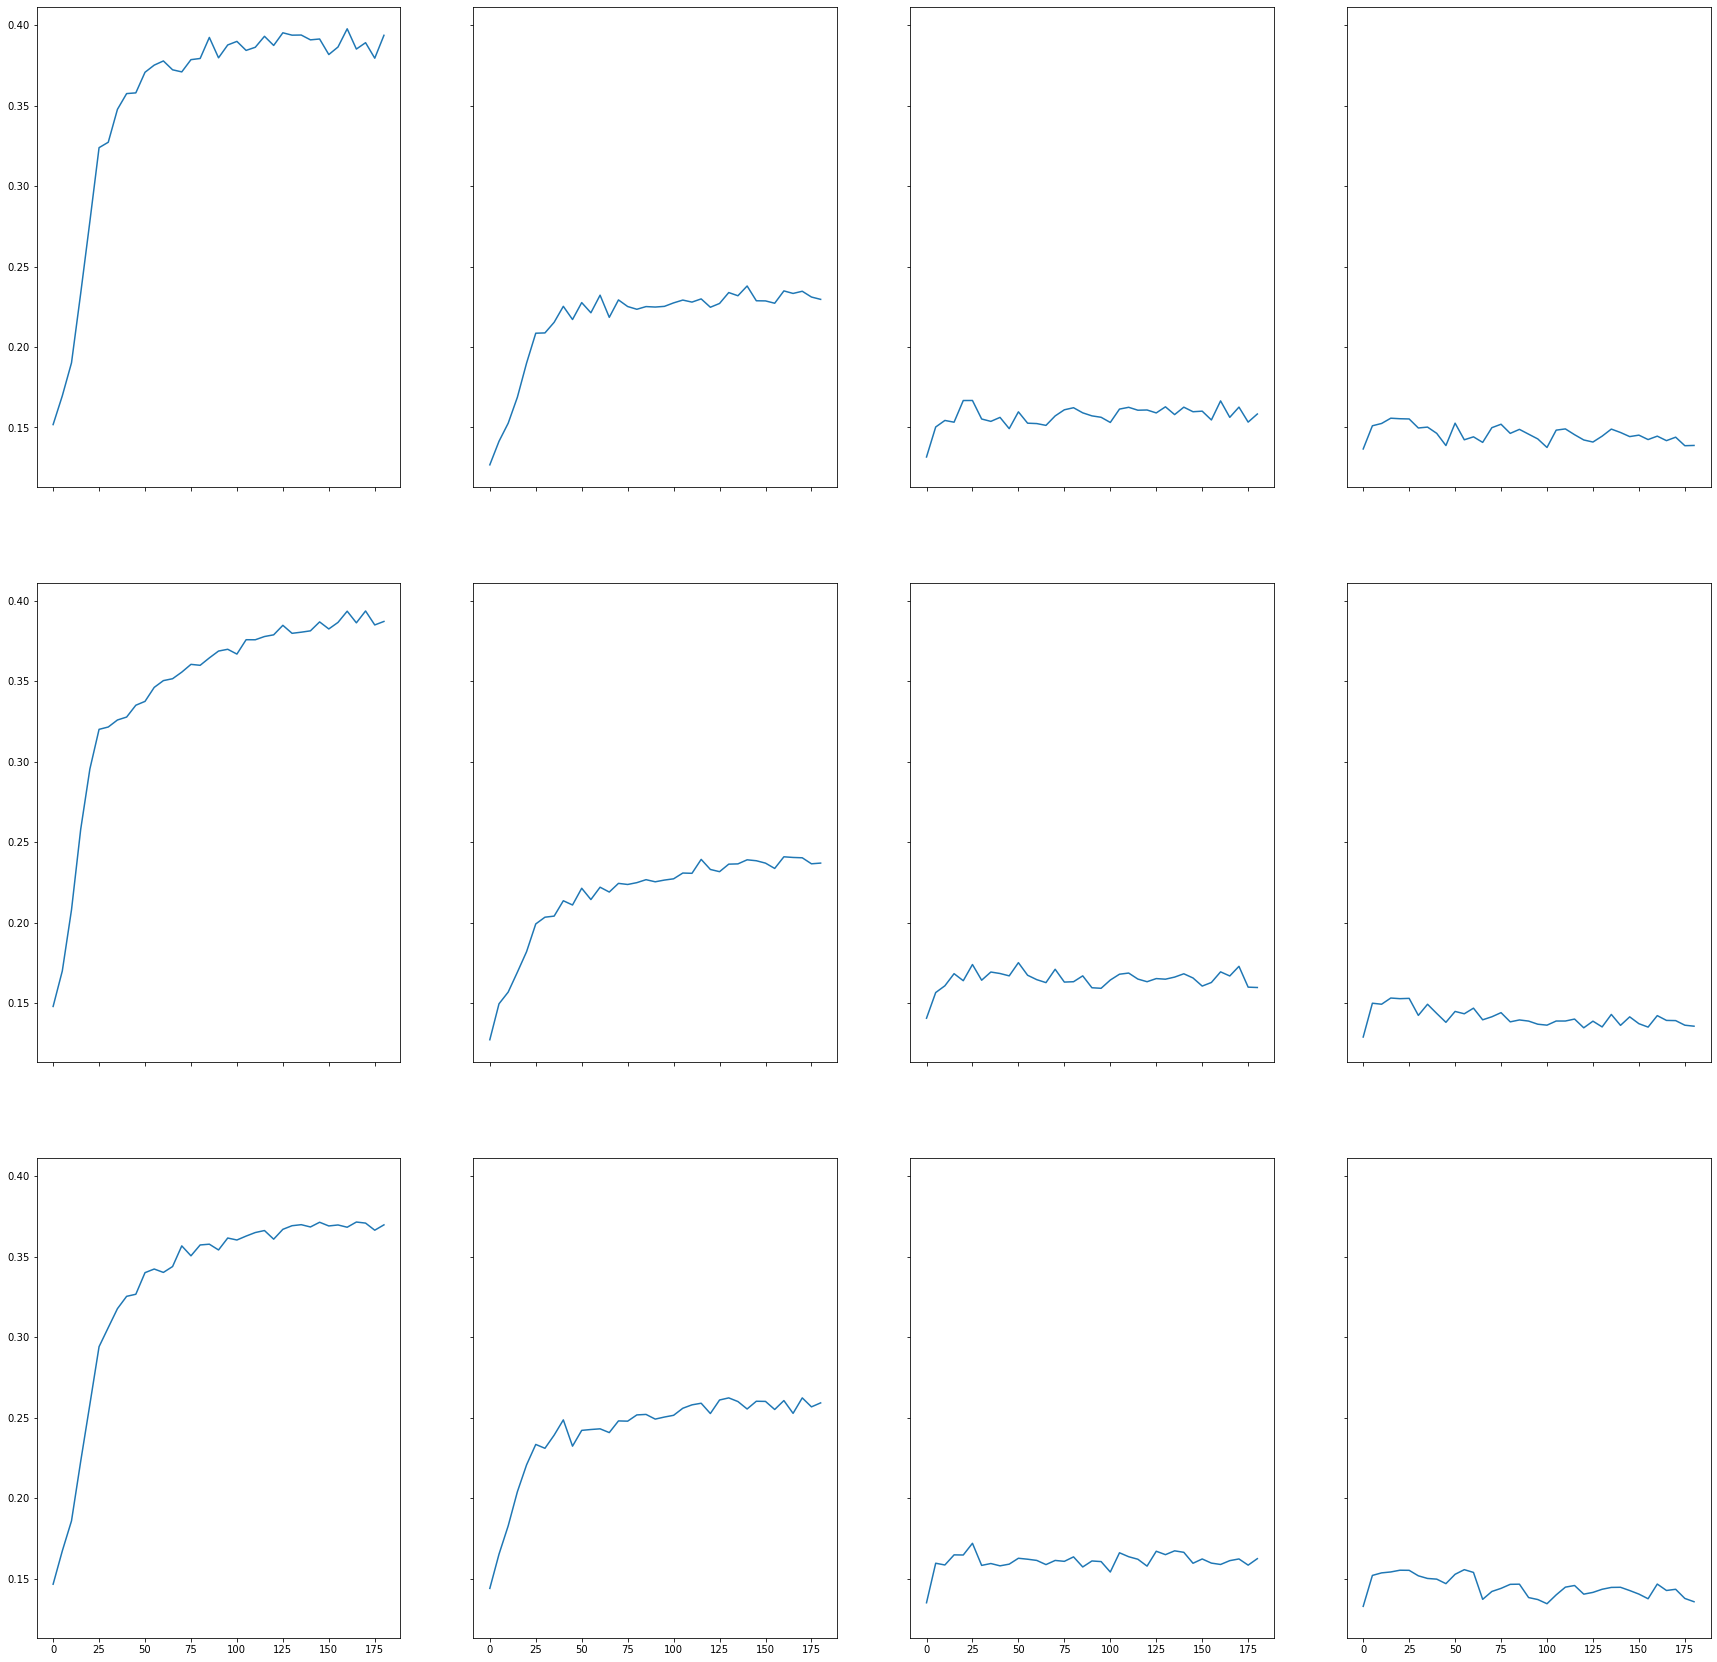

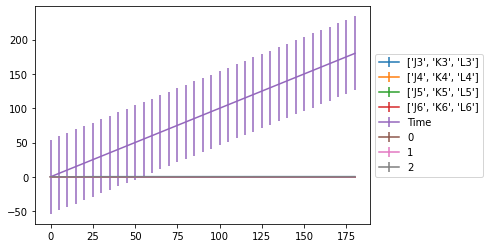

In [3]:
test_2 = px.main('../results/SHERLOCK/1st_try_probe_dilution/sherlock_probe_concentr_3_v2.xlsx',
               75,"YES",3,4,'col',['J6','K6','L6'],"YES")
test_2.rename(columns={"['J3', 'K3', 'L3']": '2µM_P',
                   "['J4', 'K4', 'L4']": '1µM_P',
                     "['J5', 'K5', 'L5']":'0.1µM_P' ,
                     "['J6', 'K6', 'L6']": 'NC',
                     0: '2µM_P_std',
                   1: '1µM_P_std',
                     2:'0.1µM_P_std' ,
                     3:'NC_std'
                     },
          inplace=True, errors='raise')

In [4]:
test_2.columns

Index(['2µM_P', '1µM_P', '0.1µM_P', 'NC', 'Time', '2µM_P_std', '1µM_P_std',
       '0.1µM_P_std', 'NC_std'],
      dtype='object')

In [22]:
Tu = 0.001
Pa = 0.15
Pi = 2
Tc = 0.001
GC = 0.4 
K1 = 0.1
K2 = 0.05
K3 = 10
K4 = 0.001
Km = 0.5

z = [Tu,Pa,Pi,Tc]
param  = [GC,K1,K2,K3,K4,Km]

bnds_2 = [(0.3,0.43),(0.00001,1),(0.0001,1),(0.001,100),(0.0001,10),(0.001,1000)]
res_2 = optimize.minimize(error, param, args=(list(test_2[test_2.columns[1]])))#,bounds=bnds_2,method='Nelder-Mead')
print(res_2.x)

[0.71774408 0.19840155 0.05       9.99999999 5.64125804 0.28161746]


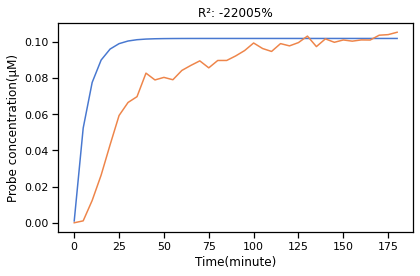

In [24]:
times = np.linspace(0,180,37)

sol_2 = solve_ivp(syst2,t_span =[0, times.max()], y0= z , args =([res_2.x]),
                    t_eval=times,dense_output=True)

m_2 = sol_2.sol(times)
r_2 = r2_score(test_2[test_2.columns[2]],m_2[3])

sns.set_context('notebook')
sns.set_palette("muted")

plt.plot(times,m_2[3])
plt.plot(times,test_2[test_2.columns[1]])
plt.xlabel('Time(minute)')
plt.ylabel('Probe concentration(µM)')
plt.title('R²: '+str(round(r_2*100))+'%')
plt.tight_layout()
#plt.savefig("images/SHERLOCK/modeling/first_attempt.png",dpi=300)
plt.show()